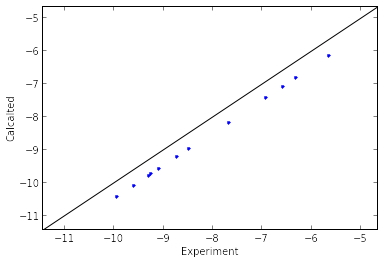

In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

x = 5*np.random.rand(12) - 10

### Scenario 1
y = 1.0*x - 0.5

### Scenario 2
#y = np.random.normal(x,1.0) - 1.0
#x[1] = 0
#y[1] = -20

min = np.amin(np.array([np.amin(x),np.amin(y)]))-1
max = np.amax(np.array([np.amax(x),np.amax(y)]))+1
plt.axis([min, max, min, max])
plt.xlabel('Experiment')
plt.ylabel('Calcalted')
plt.plot([min, max], [min,max], 'k-');
plt.plot(x, y, 'b.');


       Slope    1.00  (  0.00)
      Interc   -0.50  (  0.00)
           R    1.00  (  0.00)
         R^2    1.00  (  0.00)
        RMSE    0.50  (  0.00)
         MSE   -0.50  (  0.00)
         MUE    0.50  (  0.00)
         TAU    1.00  (  0.00)


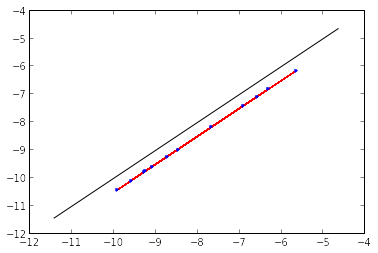

In [2]:
BootCyc=10000
R = np.zeros([BootCyc], np.float64)
R2 = np.zeros([BootCyc], np.float64)
RMSE = np.zeros([BootCyc], np.float64)
MSE = np.zeros([BootCyc], np.float64)
MUE = np.zeros([BootCyc], np.float64)
Slp = np.zeros([BootCyc], np.float64)
Int = np.zeros([BootCyc], np.float64)
Tau = np.zeros([BootCyc], np.float64)
MetricNames = ('Slope', 'Interc', 'R', 'R^2', 'RMSE', 'MSE', 'MUE', 'TAU')
SampleTypes = ('NoUWoutRep', 'LgUWoutRep', 'NoUWRep', 'LgUWRep')
MetricVals = np.zeros([len(SampleTypes),len(MetricNames)], np.float64)
MetricErrs = np.zeros([len(SampleTypes),len(MetricNames)], np.float64)
MTmp = np.zeros([len(MetricNames),BootCyc], np.float64)
xtmp = np.zeros([len(x)], np.float64)
ytmp = np.zeros([len(x)], np.float64)
yfit = np.zeros([len(x)], np.float64)
plt.plot([min, max], [min,max], 'k-', zorder=2);
plt.plot(x, y, 'b.', zorder=3);
plt.hold(True);

SampleType = 0
for b in range(BootCyc):
    for i in range(len(x)):
        j = i                          # Sample without replacment
        #j = np.random.randint(len(x))  # Sample with replacement
        xtmp[i] = np.random.normal(x[j], 0.00001)  # No uncertainty on experiment
        ytmp[i] = np.random.normal(y[j], 0.00001)  # No uncertainty on calculated
    
    # Slope, Intercept, R
    MTmp[0,b], MTmp[1,b], MTmp[2,b], pval, stderr = stats.linregress(xtmp,ytmp)
    # R^2
    MTmp[3,b] = MTmp[2,b]**2
    # RMSE
    MTmp[4,b] = np.sqrt(np.mean(((ytmp - xtmp) ** 2)))
    # MSE
    MTmp[5,b] = np.mean((ytmp - xtmp))
    # MUE
    MTmp[6,b] = np.mean(np.absolute(ytmp - xtmp))
    # Tau
    MTmp[7,b], prob = stats.kendalltau(xtmp,ytmp)
    yfit = MTmp[1,b] + MTmp[0,b]*xtmp
    plt.plot(xtmp, yfit, 'r-', alpha=0.05, zorder=1)

for i in range(len(MetricNames)):
    MetricVals[SampleType,i]=np.mean(MTmp[i])
    MetricErrs[SampleType,i]=np.std(MTmp[i])
    print "%12s  %6.2f  (%6.2f)" % (MetricNames[i],MetricVals[SampleType,i],MetricErrs[SampleType,i])





       Slope    1.00  (  0.42)
      Interc   -0.53  (  3.46)
           R    0.58  (  0.19)
         R^2    0.37  (  0.20)
        RMSE    2.02  (  0.41)
         MSE   -0.50  (  0.57)
         MUE    1.65  (  0.36)
         TAU    0.42  (  0.17)


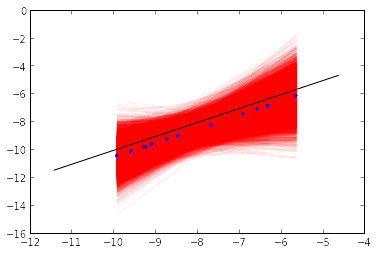

In [3]:
plt.plot([min, max], [min,max], 'k-', zorder=2);
plt.plot(x, y, 'b.', zorder=3);
plt.hold(True);

SampleType = 1
for b in range(BootCyc):
    for i in range(len(x)):
        j = i                          # Sample without replacment
        #j = np.random.randint(len(x))  # Sample with replacement
        xtmp[i] = np.random.normal(x[j], 0.00001)  # No uncertainty on experiment
        ytmp[i] = np.random.normal(y[j], 2.00001)  # Large uncertainty on calculated
    
    # Slope, Intercept, R
    MTmp[0,b], MTmp[1,b], MTmp[2,b], pval, stderr = stats.linregress(xtmp,ytmp)
    # R^2
    MTmp[3,b] = MTmp[2,b]**2
    # RMSE
    MTmp[4,b] = np.sqrt(np.mean(((ytmp - xtmp) ** 2)))
    # MSE
    MTmp[5,b] = np.mean((ytmp - xtmp))
    # MUE
    MTmp[6,b] = np.mean(np.absolute(ytmp - xtmp))
    # Tau
    MTmp[7,b], prob = stats.kendalltau(xtmp,ytmp)
    yfit = MTmp[1,b] + MTmp[0,b]*xtmp
    plt.plot(xtmp, yfit, 'r-', alpha=0.05, zorder=1)

for i in range(len(MetricNames)):
    MetricVals[SampleType,i]=np.mean(MTmp[i])
    MetricErrs[SampleType,i]=np.std(MTmp[i])
    print "%12s  %6.2f  (%6.2f)" % (MetricNames[i],MetricVals[SampleType,i],MetricErrs[SampleType,i])



       Slope    1.00  (  0.00)
      Interc   -0.50  (  0.00)
           R    1.00  (  0.00)
         R^2    1.00  (  0.00)
        RMSE    0.50  (  0.00)
         MSE   -0.50  (  0.00)
         MUE    0.50  (  0.00)
         TAU    0.92  (  0.05)


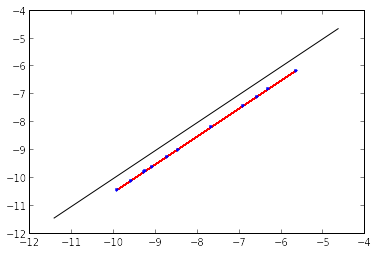

In [4]:
plt.plot([min, max], [min,max], 'k-', zorder=2);
plt.plot(x, y, 'b.', zorder=3);
plt.hold(True);

SampleType = 2
for b in range(BootCyc):
    for i in range(len(x)):
        #j = i                          # Sample without replacment
        j = np.random.randint(len(x))  # Sample with replacement
        xtmp[i] = np.random.normal(x[j], 0.00001)  # No uncertainty on experiment
        ytmp[i] = np.random.normal(y[j], 0.00001)  # No uncertainty on calculated
    
    # Slope, Intercept, R
    MTmp[0,b], MTmp[1,b], MTmp[2,b], pval, stderr = stats.linregress(xtmp,ytmp)
    # R^2
    MTmp[3,b] = MTmp[2,b]**2
    # RMSE
    MTmp[4,b] = np.sqrt(np.mean(((ytmp - xtmp) ** 2)))
    # MSE
    MTmp[5,b] = np.mean((ytmp - xtmp))
    # MUE
    MTmp[6,b] = np.mean(np.absolute(ytmp - xtmp))
    # Tau
    MTmp[7,b], prob = stats.kendalltau(xtmp,ytmp)
    yfit = MTmp[1,b] + MTmp[0,b]*xtmp
    plt.plot(xtmp, yfit, 'r-', alpha=0.05, zorder=1)

for i in range(len(MetricNames)):
    MetricVals[SampleType,i]=np.mean(MTmp[i])
    MetricErrs[SampleType,i]=np.std(MTmp[i])
    print "%12s  %6.2f  (%6.2f)" % (MetricNames[i],MetricVals[SampleType,i],MetricErrs[SampleType,i])


       Slope    1.00  (  0.46)
      Interc   -0.46  (  3.87)
           R    0.56  (  0.21)
         R^2    0.36  (  0.20)
        RMSE    2.02  (  0.41)
         MSE   -0.50  (  0.58)
         MUE    1.65  (  0.36)
         TAU    0.39  (  0.18)


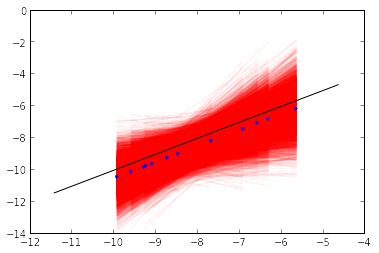

In [5]:
plt.plot([min, max], [min,max], 'k-', zorder=2);
plt.plot(x, y, 'b.', zorder=3);
plt.hold(True);


SampleType = 3
for b in range(BootCyc):
    for i in range(len(x)):
        #j = i                          # Sample without replacment
        j = np.random.randint(len(x))  # Sample with replacement
        xtmp[i] = np.random.normal(x[j], 0.00001)  # No uncertainty on experiment
        ytmp[i] = np.random.normal(y[j], 2.00001)  # Large uncertainty on calculated
    
    # Slope, Intercept, R
    MTmp[0,b], MTmp[1,b], MTmp[2,b], pval, stderr = stats.linregress(xtmp,ytmp)
    # R^2
    MTmp[3,b] = MTmp[2,b]**2
    # RMSE
    MTmp[4,b] = np.sqrt(np.mean(((ytmp - xtmp) ** 2)))
    # MSE
    MTmp[5,b] = np.mean((ytmp - xtmp))
    # MUE
    MTmp[6,b] = np.mean(np.absolute(ytmp - xtmp))
    # Tau
    MTmp[7,b], prob = stats.kendalltau(xtmp,ytmp)
    yfit = MTmp[1,b] + MTmp[0,b]*xtmp
    plt.plot(xtmp, yfit, 'r-', alpha=0.05,  zorder=1)
    

for i in range(len(MetricNames)):
    MetricVals[SampleType,i]=np.mean(MTmp[i])
    MetricErrs[SampleType,i]=np.std(MTmp[i])
    print "%12s  %6.2f  (%6.2f)" % (MetricNames[i],MetricVals[SampleType,i],MetricErrs[SampleType,i])

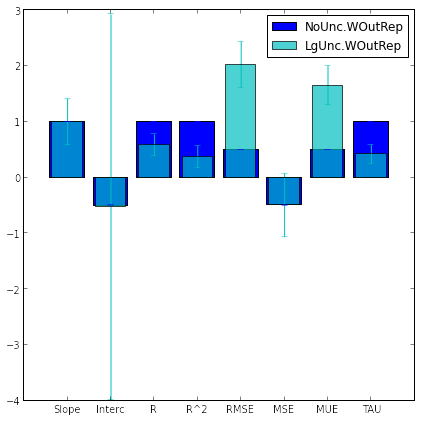

Metric        NoUnc.WOutRep        LgUnc.WOutRep         NoUnc.WRep         LgUnc.WRep
       Slope   1.00  (  0.00)      1.00  (  0.42)      1.00  (  0.00)      1.00  (  0.46)    
      Interc  -0.50  (  0.00)     -0.53  (  3.46)     -0.50  (  0.00)     -0.46  (  3.87)    
           R   1.00  (  0.00)      0.58  (  0.19)      1.00  (  0.00)      0.56  (  0.21)    
         R^2   1.00  (  0.00)      0.37  (  0.20)      1.00  (  0.00)      0.36  (  0.20)    
        RMSE   0.50  (  0.00)      2.02  (  0.41)      0.50  (  0.00)      2.02  (  0.41)    
         MSE  -0.50  (  0.00)     -0.50  (  0.57)     -0.50  (  0.00)     -0.50  (  0.58)    
         MUE   0.50  (  0.00)      1.65  (  0.36)      0.50  (  0.00)      1.65  (  0.36)    
         TAU   1.00  (  0.00)      0.42  (  0.17)      0.92  (  0.05)      0.39  (  0.18)    


In [6]:
plt.figure(figsize=(7,7))
xpos = np.arange(len(MetricNames))
plt.bar(xpos, MetricVals[0], yerr=MetricErrs[0], color='b', ecolor='b', 
        align='center', alpha=1.0, zorder=1, width=0.8, label='NoUnc.WOutRep')
plt.bar(xpos, MetricVals[1], yerr=MetricErrs[1], color='c', ecolor='c',
        align='center', alpha=0.7, zorder=2, width=0.7, label='LgUnc.WOutRep')
#plt.bar(xpos, MetricVals[2], yerr=MetricErrs[2], color='m', ecolor='m',
#        align='center', alpha=0.6, zorder=3, width=0.6, label='NoUnc.WRep')
#plt.bar(xpos, MetricVals[3], yerr=MetricErrs[3], color='y', ecolor='y',
#        align='center', alpha=0.5, zorder=4, width=0.5, label='LgUnc.WRep')
plt.xticks(xpos, MetricNames)
plt.legend()
plt.show()

print "Metric        NoUnc.WOutRep        LgUnc.WOutRep         NoUnc.WRep         LgUnc.WRep"
for i in range(len(MetricNames)):
    print "%12s" % MetricNames[i],
    for SampleType in range(len(SampleTypes)):
        print "%6.2f  (%6.2f)   " % (MetricVals[SampleType,i],MetricErrs[SampleType,i]),
    print ''